# Inverstigation of EDP

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }<\style>"))

In [2]:
import datetime
print(datetime.datetime.now())

2019-01-08 14:50:18.373332


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [6]:
result_path = u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/hdf_married_couples/"

In [7]:
df = pd.read_hdf(result_path+"married_couples_step_last.h5", "fiscr")

In [8]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

We define the taxable income (Revenu Brut Global) based on the 7 income categories present in the database.

In [9]:
household_income_vars = ["ZTSAM", "ZRAGM", "ZRACM","ZRNCM", "ZFONM", "ZPERM","ZRICM"]
for var in household_income_vars:
    df["Delta_{}".format(var)] = df["{}_2014".format(var)] - df["{}_2011".format(var)]

In [10]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

(50000, 160000)

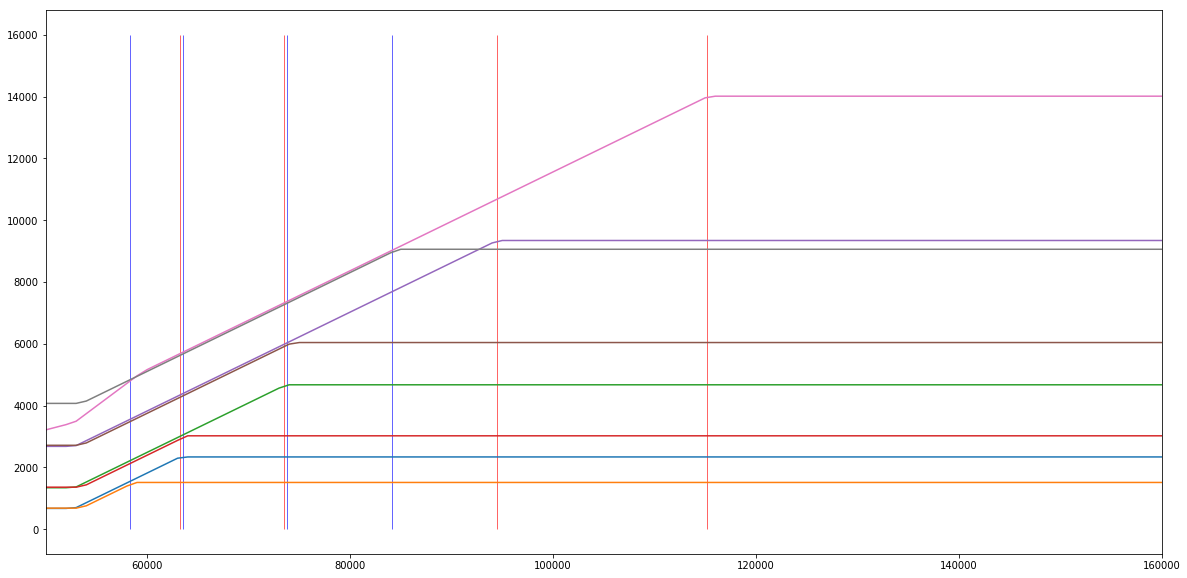

In [11]:
import importlib
year = 2014

ir_2014 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union")

ir_2011 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union_{}".format(2011))

dict_gain_ir_2011_by_child = dict()
dict_gain_ir_2014_by_child = dict()
for child in range(1,6):
    ir_x_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2011.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2011_by_child[child] = ir_0_children - ir_x_children 
    
    ir_x_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2014_by_child[child] = ir_0_children - ir_x_children 
    
    
    

plt.figure(figsize=(20,10))
for child in range(1,5):
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2011_by_child[child])
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2014_by_child[child])
for thrsh in threshold_byr_rbg["2011"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "r")
for thrsh in threshold_byr_rbg["2014"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "b")
plt.xlim(50000,160000)

#ir_2011.ir_avec_plafond_qf_enfant(pd.Series(range(0,2*10**5, 1000)), ir.parts_fiscales_enfants(pd.Series([3.0]*200).astype("float"))).plot()

In [12]:
parts_fiscales_enfants = ir_2014.parts_fiscales_enfants(df.NBPAC_2011)

In [13]:
df["Irpp_2011"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, parts_fiscales_enfants)
df["Irpp_2014"] = ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, parts_fiscales_enfants)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in maximum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)


In [15]:
ir_2011.decote_ir(df.Rbg_2011, parts_fiscales_enfants)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in maximum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)


0          -0.00000
1          -0.00000
2          -0.00000
3          -0.00000
4         219.78100
5         202.23325
6          -0.00000
7         253.00650
8          -0.00000
9          -0.00000
10        257.43950
11        281.81550
12         -0.00000
13         15.51100
14        439.00000
15        439.00000
16         42.08975
17         -0.00000
18         -0.00000
19         -0.00000
20         -0.00000
21        192.06650
22        439.00000
23         -0.00000
24        256.69425
25        439.00000
26         -0.00000
27         -0.00000
28        439.00000
29         -0.00000
            ...    
789713    171.35900
789714     90.74825
789715     96.28400
789716     -0.00000
789717     -0.00000
789718    397.73350
789719     -0.00000
789720    439.00000
789721    271.47000
789722     94.57600
789723     -0.00000
789724      8.63875
789725    134.37975
789726    206.54250
789727     -0.00000
789728     -0.00000
789729     -0.00000
789730     -0.00000
789731     -0.00000


In [29]:
ir_2011.decote_ir(np.array([20_000]),np.array([1]))

array([ 380.9475])

In [32]:
df["Irpp_2011"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, parts_fiscales_enfants)
df["Irpp_2014"] = ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, parts_fiscales_enfants)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in maximum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)


In [45]:
df["Decote_2011"] = ir_2011.decote_ir(df.Rbg_2011, parts_fiscales_enfants)
df["Decote_2014"] = ir_2014.decote_ir(df.Rbg_2011, parts_fiscales_enfants)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in maximum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union.py:24: RuntimeWarning: invalid value encountered in maximum
  a = n

In [50]:
(df.query("Rbg_2011>50000").Decote_2014>0).value_counts()

False    198669
True       4569
Name: Decote_2014, dtype: int64

In [51]:
df["Irpp_2011_decote"] = np.maximum(0, df.Irpp_2011- ir_2011.decote_ir(df.Rbg_2011, parts_fiscales_enfants))
df["Irpp_2014_decote"] = np.maximum(0, df.Irpp_2014- ir_2014.decote_ir(df.Rbg_2014, parts_fiscales_enfants))#changer pour parts fiscales enfants 2014

C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in maximum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in maximum
  """Entry point for launching an IPython kernel.


In [52]:
(df["Irpp_2011_decote"]>0).value_counts()

True     658986
False    130757
Name: Irpp_2011_decote, dtype: int64

(353928, 523)


(0, 15000)

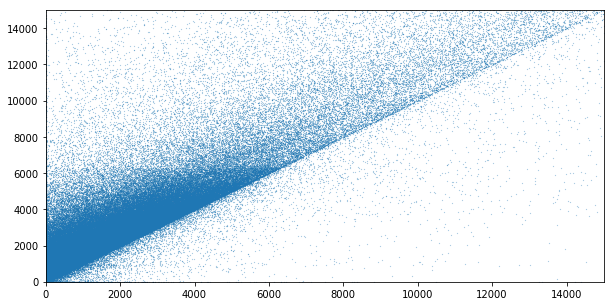

In [41]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_2011,df_temp.Irpp_2011_decote, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(330234, 522)


(0, 15000)

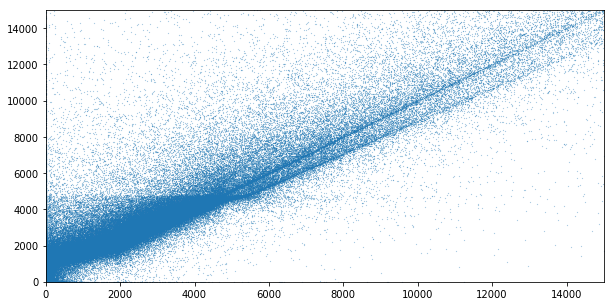

In [15]:
df_temp = df.query("(NBPAC_2011 ==0) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(353928, 527)


(0, 15000)

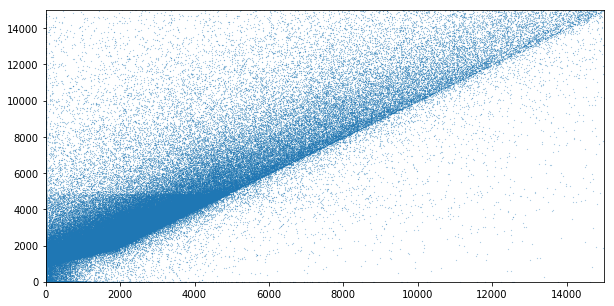

In [59]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(106558, 527)


(0, 15000)

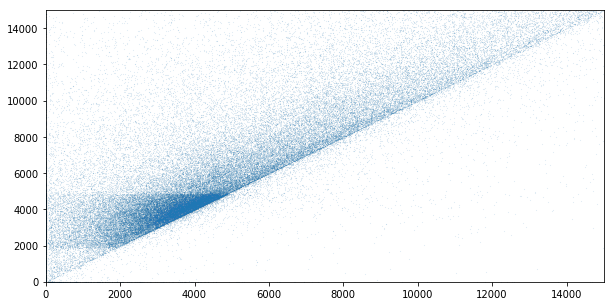

In [54]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014<4)&(50_000<Rbg_2011<200_000)")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014_decote, s=0.002 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(106558, 527)


(0, 15000)

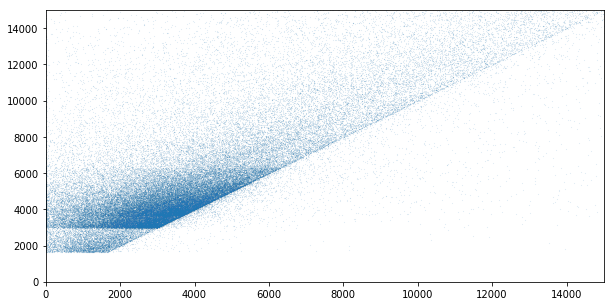

In [55]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014<4)&(50_000<Rbg_2011<200_000)")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_2011,df_temp.Irpp_2011_decote, s=0.002 )
plt.xlim(0,15000)
plt.ylim(0,15000)

## Needed variables

In [18]:
nb_enf_max_for_annalysis = 5

In [19]:
child_bool_list = ["child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)]
cumulative_child_bool_list = ["cumulative_child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)] 

In [20]:
all_thresholds = pd.concat([threshold_byr_rbg["2011"], threshold_byr_rbg["2014"]]).sort_values()
thrsh_bool_list = ["Threshold_{}".format(thrsh) for thrsh in  all_thresholds ]

In [21]:
between_threshold_for_child_rank = ["Between_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
over_threshold_for_child_rank = ["Over_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
children_number =  ["child_{}".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]

interaction_child_between_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, between_threshold_for_child_rank)]
interaction_child_over_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, over_threshold_for_child_rank)]

In [22]:
hardcoded_over = ["Over_{}_X_{}_child".format(child,child) for child in range(1,nb_enf_max_for_annalysis+1)]
hardcoded_between = ["Between_{}_X_{}_child".format(child,child) for child in range(1,nb_enf_max_for_annalysis+1)]

### Income sample selection

In [23]:
df.shape

(789743, 522)

In [24]:
#Nouvelle version ou il faut appartenir à l'intervalle de revenu que sur un seule des deux années
df = df[((
            (df.Rbg_2011>50000)
            &(df.Rbg_2011<200000)
        )|(
            (df.Rbg_2014>50000)
            & (df.Rbg_2014<200000)))]

In [25]:
nb_enf_max_for_annalysis

5

In [26]:
df = df[df.NBPAC_2011<=nb_enf_max_for_annalysis]

In [27]:
age_max_parents = 62

In [28]:
print(((df.Age_mother>age_max_parents)|(df.Age_father>age_max_parents)).value_counts()) 
df = df[~((df.Age_mother>age_max_parents)|(df.Age_father>age_max_parents))]

False    211859
True      41972
dtype: int64


In [29]:
## On vire les variations extrèmes pour ne pas avoir de revenus négatifs.

In [30]:
low = 0.025
high = 0.975
quant_df = df.Delta_Rbg.quantile([low,high])
print(quant_df)
df = df[df.Delta_Rbg>quant_df.loc[low]]
df = df[df.Delta_Rbg<quant_df.loc[high]]

0.025   -40986.045
0.975    49689.305
Name: Delta_Rbg, dtype: float64


In [31]:
print(df.Rbg_2011.min())
print(df.Rbg_2014.min())
print(df.Rbg_2011.max())
print(df.Rbg_2014.max())


1666.8
9776.3
237328.0
246526.0


In [32]:
print((df.Rbg_2011<=1000).value_counts())
print((df.Rbg_2014<=1000).value_counts())

False    198752
Name: Rbg_2011, dtype: int64
False    198752
Name: Rbg_2014, dtype: int64


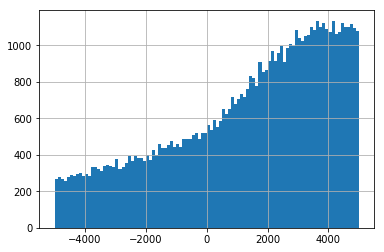

In [33]:
df.query("-5000<Delta_Rbg<5000").Delta_Rbg.hist(bins = 100)

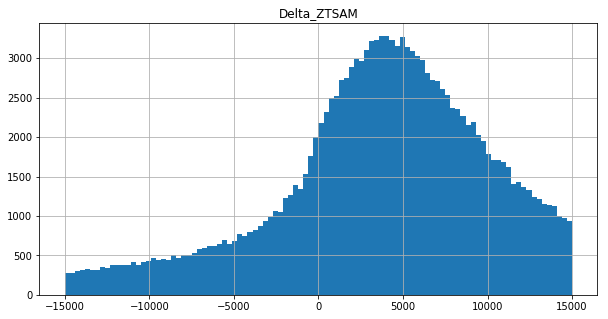

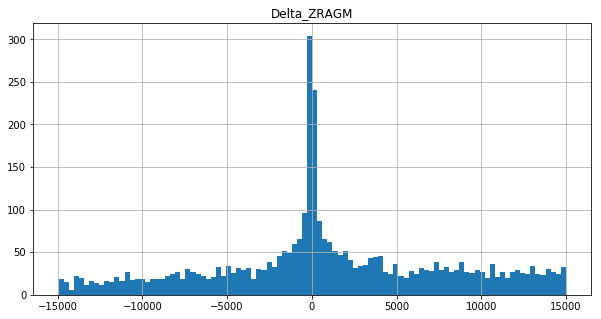

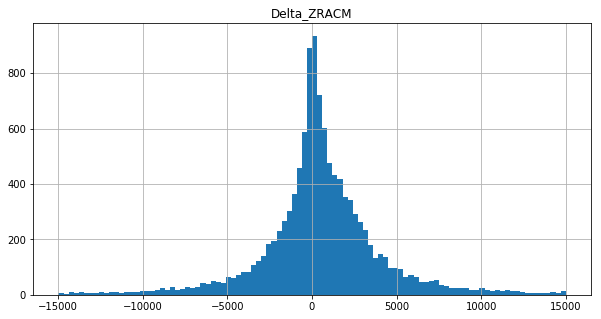

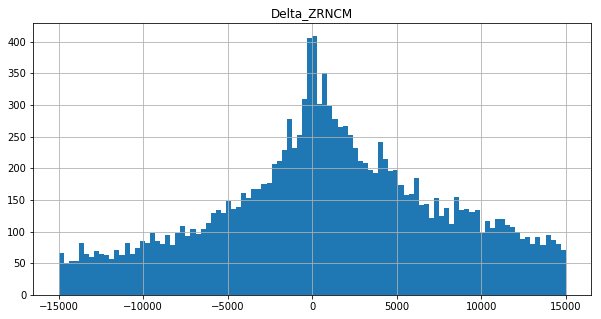

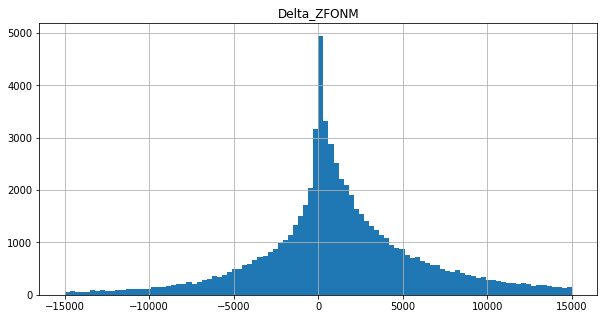

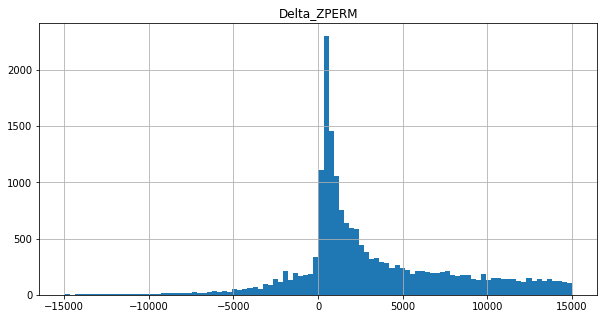

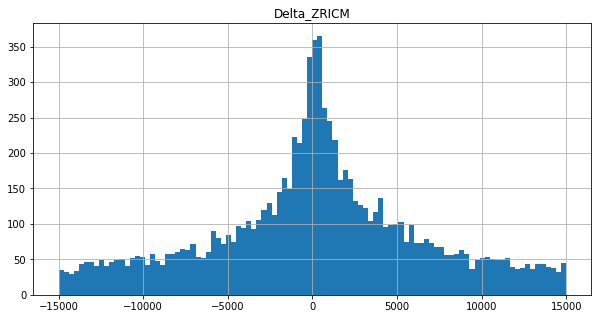

In [34]:
for var in household_income_vars:
    plt.figure(figsize=(10,5))
    df.query("(-15000<Delta_{}<15000) &(Delta_{}!=0)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
    plt.title("Delta_{}".format(var))

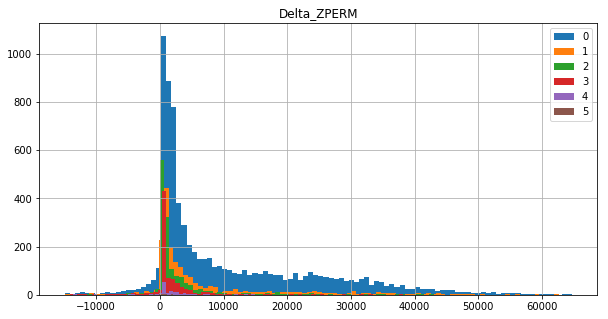

In [35]:
var = "ZPERM"
plt.figure(figsize=(10,5))
for nb_child in range(0,6):
    df.query("(-15000<Delta_{}<65000) &(Delta_{}!=0)&(ZPERM_2011>10000)&(NBPAC_2011==@nb_child)".format(var, var))["Delta_{}".format(var)].hist(bins = 100, label = "{}".format(nb_child))
plt.title("Delta_{}".format(var))
plt.legend()

Text(0.5,1,'Delta_ZPERM')

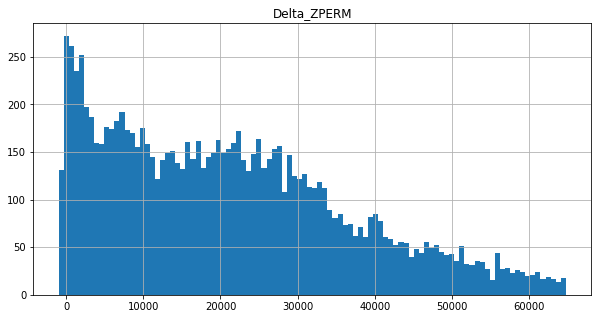

In [36]:
var = "ZPERM"
plt.figure(figsize=(10,5))
df.query("(-15000<Delta_{}<65000) &(Delta_{}!=0)&(ZPERM_2011<1000)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
plt.title("Delta_{}".format(var))

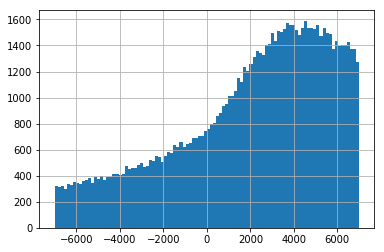

In [37]:
df.query("(-7000<Delta_Rbg<7000)").Delta_Rbg.hist(bins = 100)

In [38]:
(df.ZPERM_2014>0).value_counts(normalize = True)

False    0.853888
True     0.146112
Name: ZPERM_2014, dtype: float64

We have 28% of the sample that has retirement income. It creates a mass in the change in income at 2000 euros.

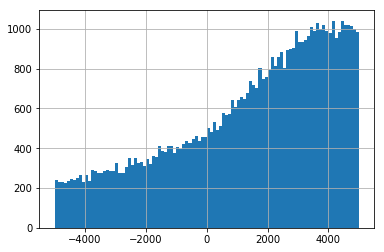

In [39]:
df.query("(-5000<Delta_Rbg<5000)&(ZPERM_2011<50)").Delta_Rbg.hist(bins = 100)

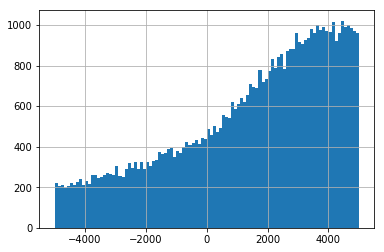

In [40]:
df.query("(-5000<Delta_Rbg<5000)&(ZPERM_2014<50)").Delta_Rbg.hist(bins = 100)

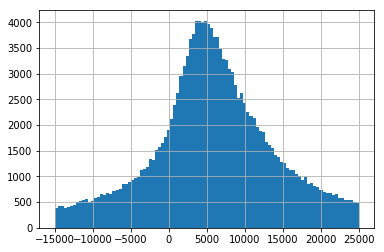

In [41]:
df.query("(-15000<Delta_Rbg<25000)&(ZPERM_2011<50)").Delta_Rbg.hist(bins = 100)

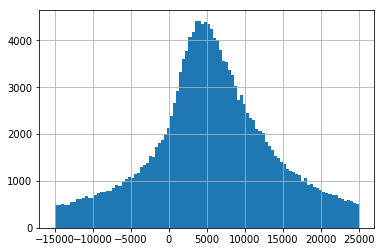

In [42]:
df.query("(-15000<Delta_Rbg<25000)").Delta_Rbg.hist(bins = 100)

In [43]:
(df.Rbg_2014==0).value_counts()

False    198752
Name: Rbg_2014, dtype: int64

In [44]:
df.query("NBPAC_2011<5").shape

(197738, 522)

In [45]:
df["Delta_NBPAC"] = df.NBPAC_2014 - df.NBPAC_2011

In [46]:
(df.Delta_NBPAC!=0).value_counts(normalize = True)

False    0.837753
True     0.162247
Name: Delta_NBPAC, dtype: float64

15% has experienced a birth or a child departure over the 2011,2014 period.  
We will focus our analysis only on households with a fixed family structure.

In [47]:
df.shape

(198752, 523)

In [48]:
df[df.NBPAC_2011 == df.NBPAC_2014].shape

(166505, 523)

### We only keep family structure with the same number of children

In [49]:
df = df[df.NBPAC_2011 == df.NBPAC_2014]

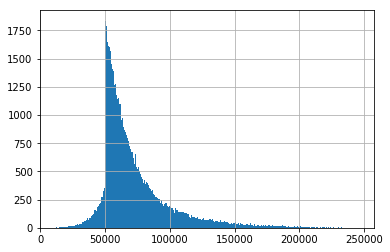

In [50]:
df.Rbg_2014.hist(bins = 900)

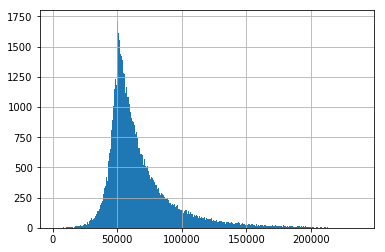

In [51]:

df.Rbg_2011.hist(bins = 900)

In [52]:
print((df.Rbg_2011 == 0).value_counts(normalize = True))
print((df.Rbg_2014 == 0).value_counts(normalize = True))

False    1.0
Name: Rbg_2011, dtype: float64
False    1.0
Name: Rbg_2014, dtype: float64


In [53]:
range(nb_enf_max_for_annalysis+1)

range(0, 6)

In [54]:
%%time
df = df[df.NBPAC_2011.isin(range(nb_enf_max_for_annalysis+1))]#,6,7])]
#reg_df = reg_df[reg_df.AGERF_2011<50]

Wall time: 1.01 s


In [55]:
df.shape

(166505, 523)

In [56]:
import statsmodels.api as sm
df["Rbg_splines"]  = pd.cut(df.Rbg_2011, 10)

In [57]:
df = df[(df.NBPAC_2011 == df.NBPAC_2014)]

### Stat Des

In [58]:
stat_des_variables = ["Rbg_2011","Rbg_2014","Delta_rbg","Age_father", "Age_mother","NBPAC_2011" , "Age_youngest_child", "Age_eldest_child"]

In [59]:
df[stat_des_variables].describe().loc["mean"]

Rbg_2011              67049.302223
Rbg_2014              72738.655523
Delta_rbg              5689.353300
Age_father               45.108175
Age_mother               43.226900
NBPAC_2011                1.744716
Age_youngest_child        7.861777
Age_eldest_child         11.669937
Name: mean, dtype: float64

In [60]:
df[stat_des_variables].query("NBPAC_2011==1").describe().loc["mean"]

Rbg_2011              65658.950682
Rbg_2014              70715.690553
Delta_rbg              5056.739871
Age_father               45.823914
Age_mother               43.671486
NBPAC_2011                1.000000
Age_youngest_child       10.828174
Age_eldest_child         10.828174
Name: mean, dtype: float64

In [61]:
df[stat_des_variables].query("NBPAC_2011==2").describe().loc["mean"]

Rbg_2011              66005.810868
Rbg_2014              72589.141242
Delta_rbg              6583.330373
Age_father               42.230373
Age_mother               40.286681
NBPAC_2011                2.000000
Age_youngest_child        7.625933
Age_eldest_child         11.084536
Name: mean, dtype: float64

In [62]:
df[stat_des_variables].query("NBPAC_2011==0").describe().loc["mean"]

Rbg_2011              65976.472165
Rbg_2014              67551.036076
Delta_rbg              1574.563911
Age_father               54.093428
Age_mother               52.901346
NBPAC_2011                0.000000
Age_youngest_child             NaN
Age_eldest_child               NaN
Name: mean, dtype: float64

In [63]:
### TODO: faire un multi-index avec all , 0 child, 1 ,2,3,4 and more child en colones et les variables en ignes.
stat_des_df = pd.DataFrame()

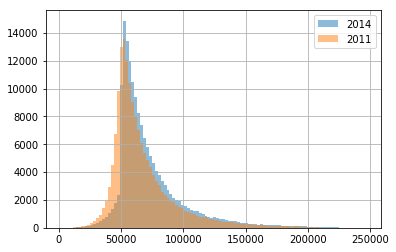

In [64]:
df.Rbg_2014.hist(bins = 100, alpha = 0.5, label = "2014")
df.Rbg_2011.hist(bins = 100,alpha = 0.5, label = "2011")
plt.legend()

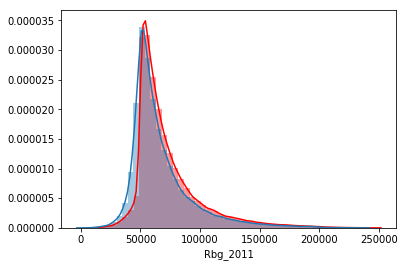

In [65]:
import seaborn as sns
sns.distplot(df.Rbg_2014, color = "r")
sns.distplot(df.Rbg_2011)

In [66]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])
threshold_byr_rbg.index = range(1,7); threshold_byr_rbg.index.name = 'nb_enf'
threshold_byr_rbg




df["Not_touched_by_reform"] = (df.NBPAC_2011 == 0).astype("int")
for nb_enf in range(1,7): ### in modification
    df["Not_touched_by_reform".format(nb_enf)
          ] +=((df.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])
                *( df.NBPAC_2011 == nb_enf)).astype("float")

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [67]:
df["Distance_to_treatment_2"]  = 0
for child in range(1,nb_enf_max_for_annalysis+1):
    df["Distance_to_treatment_2"] += df["Over_threshold_{}_child".format(child)] * df[child_bool_list[child-1]] * ((threshold_byr_rbg["2011"].iloc[child-1]) - df.Rbg_2014)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [68]:
df.Not_touched_by_reform.value_counts()

1.0    113345
0.0     53160
Name: Not_touched_by_reform, dtype: int64

In [69]:
df_desc_stat = pd.DataFrame()

for child in  range(0, nb_enf_max_for_annalysis+1):
        df_desc_stat.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Not_touched_by_reform".format(child)].value_counts()[True]


for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Over_threshold_{}_child".format(child)].value_counts()[True]
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)
df_desc_stat.loc["Total"] = df_desc_stat.sum(axis = 0)

In [70]:
df_desc_stat

,Treatment_0,Treatment_1,Treatment_2,Total
0,30652.0,NaN,NaN,30652.0
1,12021.0,2711.0,9624.0,24356.0
2,45226.0,10467.0,18938.0,74631.0
3,21436.0,4757.0,5112.0,31305.0
4,3440.0,773.0,621.0,4834.0
5,570.0,116.0,41.0,727.0
Total,113345.0,18824.0,34336.0,166505.0


#### Still in the same treatment span

In [71]:

df["Rbg2014_below_threshold_{}_child".format(0)
          ] =  True
for nb_enf in range(1,7): ### in modification
    df["Rbg2014_Over_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2014 > threshold_byr_rbg["2011"].iloc[nb_enf-1])
    df["Rbg2014_Between_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2014 > threshold_byr_rbg["2014"].iloc[nb_enf-1]) & (df.Rbg_2014 < threshold_byr_rbg["2011"].iloc[nb_enf-1])
    df["Rbg2014_below_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2014 < threshold_byr_rbg["2014"].iloc[nb_enf-1])



In [72]:
df_desc_stat_2014 = pd.DataFrame()

for child in  [0]:
        df_desc_stat_2014.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat_2014.loc[child, "Treatment_1"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat_2014.loc[child, "Treatment_2"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat_2014.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
    
df_desc_stat_2014["Total"] = df_desc_stat_2014.sum(axis = 1)

In [73]:
df_desc_stat_2014

,Treatment_0,Treatment_1,Treatment_2,Total
0,30652.0,NaN,NaN,30652.0
1,9220.0,3169.0,11967.0,24356.0
2,36336.0,13278.0,25015.0,74629.0
3,18577.0,6037.0,6691.0,31305.0
4,3104.0,942.0,788.0,4834.0
5,536.0,135.0,56.0,727.0


#### Transitions 

In [74]:
df_desc_stat = pd.DataFrame()

for child in  [0]:
    df_desc_stat.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat.loc[child, "Treatment_0"] = df.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)

In [75]:
df_desc_stat

,Treatment_0,Treatment_1,Treatment_2,Total
0,30652.0,NaN,NaN,30652.0
1,9220.0,3169.0,11967.0,24356.0
2,36336.0,13278.0,25015.0,74629.0
3,18577.0,6037.0,6691.0,31305.0
4,3104.0,942.0,788.0,4834.0
5,536.0,135.0,56.0,727.0


In [76]:
df_temp_transition =df

In [77]:
df_temp_transition["Treatment_0_2014"] = False * df.shape[0]
df_temp_transition["Treatment_0_2011"] = False * df.shape[0]


df_temp_transition["Treatment_1_2014"] = False * df.shape[0]
df_temp_transition["Treatment_1_2011"] = False * df.shape[0]

df_temp_transition["Treatment_2_2014"] = False * df.shape[0]
df_temp_transition["Treatment_2_2011"] = False * df.shape[0]



for child in range(1,7):
    df_temp_transition["Treatment_1_2014"] += (df.NBPAC_2011 == child) * df["Rbg2014_Between_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_1_2011"] += (df.NBPAC_2011 == child) * df["Between_threshold_{}_child".format(child)]
    
    df_temp_transition["Treatment_2_2014"] += (df.NBPAC_2011 == child) * df["Rbg2014_Over_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_2_2011"] += (df.NBPAC_2011 == child) * df["Over_threshold_{}_child".format(child)]
    



df_temp_transition["Treatment_1_2011"] = df_temp_transition["Treatment_1_2011"].astype("bool")
df_temp_transition["Treatment_2_2011"] = df_temp_transition["Treatment_2_2011"].astype("bool")
df_temp_transition["Treatment_1_2014"] = df_temp_transition["Treatment_1_2014"].astype("bool")
df_temp_transition["Treatment_2_2014"] = df_temp_transition["Treatment_2_2014"].astype("bool")
df_temp_transition["Treatment_0_2011"] = ~(df_temp_transition.Treatment_1_2011 |df_temp_transition.Treatment_2_2011)
df_temp_transition["Treatment_0_2014"] = ~(df_temp_transition.Treatment_1_2014 |df_temp_transition.Treatment_2_2014)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [78]:
df_temp_transition.Treatment_0_2011.value_counts()

True     113345
False     53160
Name: Treatment_0_2011, dtype: int64

In [79]:
df_temp_transition.shape

(166505, 550)

In [80]:

print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print("*"*12)
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])

7213
31014
93952
************
8557
1901
************
14447
4946
3054
1421


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [81]:

print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])

0.0433200204198
0.186264676736
0.564259331552
************
0.0513918500946
0.0114170745623
************
0.0867661631783
0.0297048136693
0.0183417915378
0.0085342782499


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [82]:
df_desc_transition = pd.DataFrame()
df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]


display(df_desc_transition)
display(df_desc_transition/df_temp_transition.shape[0])




C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,93952.0,14447.0,4946.0
Treatment_1,3054.0,7213.0,8557.0
Treatment_2,1421.0,1901.0,31014.0


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.564259,0.086766,0.029705
Treatment_1,0.018342,0.043320,0.051392
Treatment_2,0.008534,0.011417,0.186265


In [83]:
df_desc_transition/df_desc_transition.sum(0)

,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.954535,0.613174,0.111104
Treatment_1,0.031028,0.306142,0.192219
Treatment_2,0.014437,0.080684,0.696678


In [84]:
for nb_child in range(0,7):
    df_desc_transition = pd.DataFrame()
    df_temp = df_temp_transition.query("(NBPAC_2011==NBPAC_2014)& (NBPAC_2011 ==@nb_child)")
    df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_2_2014).sum(axis=0)

    print("*"*9+"{} child".format(nb_child)+"*"*9)
    print("Headcount")
    display(df_desc_transition)
    print("Share")
    display((df_desc_transition.T/df_desc_transition.sum(1)).T)




*********0 child*********
Headcount


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,30652.0,0.0,0.0
Treatment_1,0.0,0.0,0.0
Treatment_2,0.0,0.0,0.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,1.0,0.0,0.0
Treatment_1,NaN,NaN,NaN
Treatment_2,NaN,NaN,NaN


*********1 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,8026.0,2204.0,1791.0
Treatment_1,569.0,577.0,1565.0
Treatment_2,625.0,388.0,8611.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.667665,0.183346,0.148989
Treatment_1,0.209886,0.212837,0.577278
Treatment_2,0.064942,0.040316,0.894742


*********2 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,33903.0,8543.0,2780.0
Treatment_1,1715.0,3672.0,5080.0
Treatment_2,720.0,1063.0,17155.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.749635,0.188896,0.061469
Treatment_1,0.163848,0.350817,0.485335
Treatment_2,0.038019,0.056131,0.905851


*********3 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,17861.0,3213.0,362.0
Treatment_1,643.0,2444.0,1670.0
Treatment_2,73.0,380.0,4659.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.833224,0.149888,0.016887
Treatment_1,0.135169,0.513769,0.351062
Treatment_2,0.014280,0.074335,0.911385


*********4 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,2995.0,432.0,13.0
Treatment_1,106.0,441.0,226.0
Treatment_2,3.0,69.0,549.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.870640,0.125581,0.003779
Treatment_1,0.137128,0.570505,0.292367
Treatment_2,0.004831,0.111111,0.884058


*********5 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,515.0,55.0,0.0
Treatment_1,21.0,79.0,16.0
Treatment_2,0.0,1.0,40.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.903509,0.096491,0.000000
Treatment_1,0.181034,0.681034,0.137931
Treatment_2,0.000000,0.024390,0.975610


*********6 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,NaN,NaN,NaN
Treatment_1,NaN,NaN,NaN
Treatment_2,NaN,NaN,NaN


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,NaN,NaN,NaN
Treatment_1,NaN,NaN,NaN
Treatment_2,NaN,NaN,NaN


### Common trend assumption

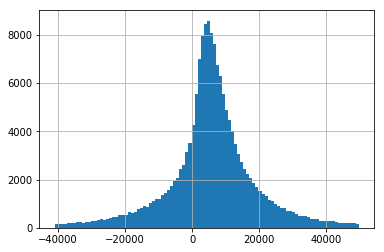

In [85]:
df.query("-50000<Delta_Rbg<50000").Delta_Rbg.hist(bins = 100)

In [86]:
import seaborn as sns

We see that there is something not very smoooth happenning for households without children:

(-10000, 20000)

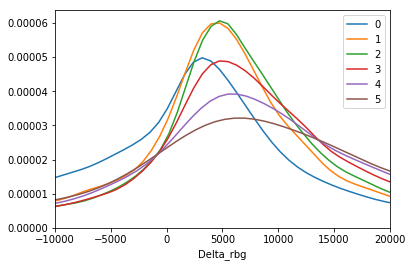

In [87]:
for child in range(0,6):
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [88]:
df.shape

(166505, 550)

When getting rid of households with an income tax equal to 0 in 2011, the curve is a lot smoother.
The average change in taxable income is way nearer to the average change for one children than the one we observe when we take out the households which does not have retirement income.

In [89]:
import seaborn as sns

(-10000, 20000)

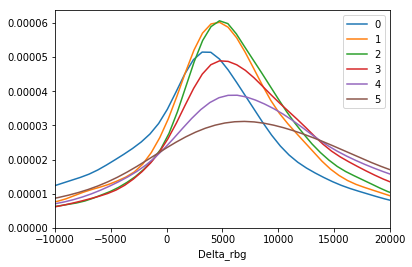

In [90]:
for child in range(0,6):
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [91]:
df.Between_thresholds

0         False
2         False
6         False
9         False
29        False
33        False
50        False
51        False
53        False
55        False
56        False
59        False
64        False
69        False
72        False
77        False
82        False
83        False
95        False
97        False
98        False
100       False
108       False
113       False
124       False
126       False
132       False
133       False
134       False
141        True
          ...  
789597    False
789602    False
789603    False
789606     True
789610    False
789615     True
789620    False
789623     True
789630    False
789632    False
789634    False
789636    False
789638    False
789639    False
789640    False
789646    False
789660    False
789669    False
789675    False
789678    False
789684    False
789688    False
789689    False
789700    False
789705    False
789707    False
789708    False
789712    False
789717    False
789727    False
Name: Between_thresholds

In [92]:
df["Below_thresholds"] = ~(df["Between_thresholds"] | df["Over_threshold"])

In [93]:
print(df.query("(NBPAC_2011==2)&(Between_thresholds)").shape)
print(df.query("(NBPAC_2011==2)&(Over_threshold)").shape)

(10467, 551)
(18938, 551)


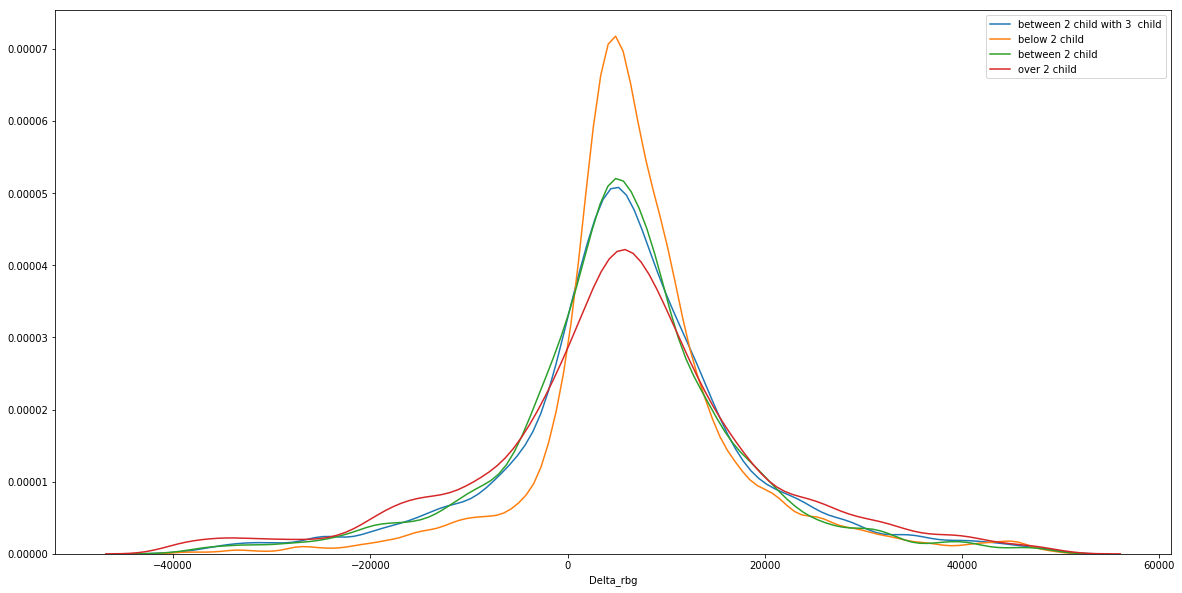

In [94]:
plt.figure(figsize=(20,10))
sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)& Between_threshold_2_child".format(3)).Delta_rbg.sample(3000), hist= False, label = "between 2 child with 3  child")
for child in [2]:
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)& Below_thresholds".format(child)).Delta_rbg.sample(3000), hist= False, label = "below 2 child")
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)& Between_thresholds".format(child)).Delta_rbg.sample(3000), hist= False, label = "between 2 child")
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)& Over_threshold & ~(Over_threshold_3_child)".format(child)).Delta_rbg.sample(3000), hist= False, label = "over 2 child")
#plt.xlim(-10000,20000)

(-10000, 20000)

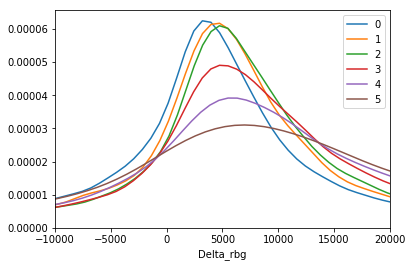

In [95]:
for child in range(0,6):
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2014==0)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

(-10000, 20000)

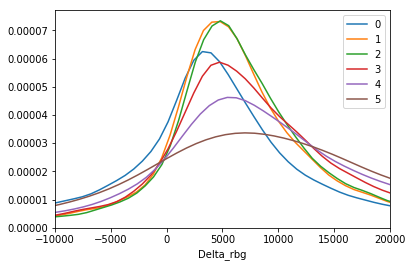

In [96]:
for child in range(0,6):
    sns.distplot(df.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2014==0)& (Treatment_0_2011)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

(-10000, 20000)

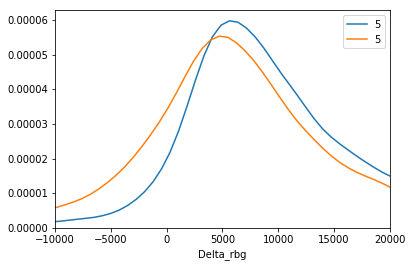

In [97]:
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)".format(child)).Delta_rbg, hist= False, label = child)
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_1_2011)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

(-10000, 20000)

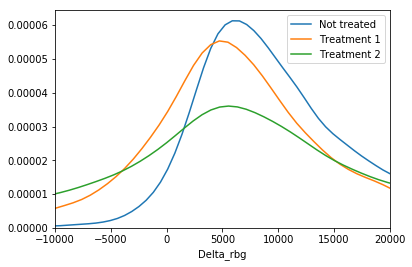

In [98]:
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)&(NBPAC_2011>0)".format(child)).Delta_rbg, hist= False, label = 'Not treated')
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_1_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 1")
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_2_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 2")
plt.xlim(-10000,20000)

(-10000, 20000)

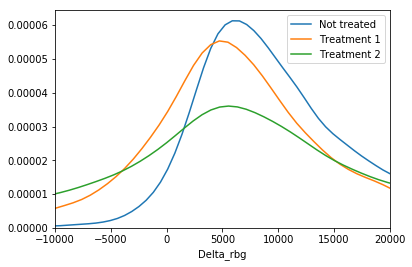

In [99]:
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)&(NBPAC_2011>0)".format(child)).Delta_rbg, hist= False, label = 'Not treated')
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_1_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 1")
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_2_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 2")
plt.xlim(-10000,20000)

(-10000, 20000)

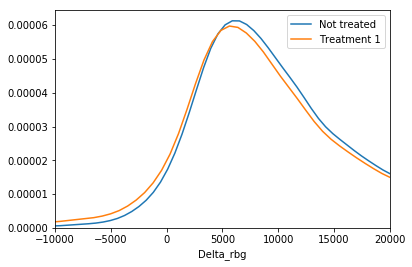

In [100]:
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)&(NBPAC_2011>0)".format(child)).Delta_rbg, hist= False, label = 'Not treated')
sns.distplot(df.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 1")
plt.xlim(-10000,20000)

In [101]:
threshold_byr_rbg

,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [102]:
for child in range(0,7):
    df["child_{}".format(child)] = df.NBPAC_2011 == child

In [103]:
print(df.query("NBPAC_2011==0").Delta_Rbg.mean())
print(df.query("child_1==True").Delta_Rbg.mean())
print(df.query("child_2==True").Delta_Rbg.mean())
print(df.query("child_3==True").Delta_Rbg.mean())
print(df.query("child_4==True").Delta_Rbg.mean())
print(df.query("child_5==True").Delta_Rbg.mean())
print(df.query("child_6==True").Delta_Rbg.mean())

1574.5639110009245
5056.739871079037
6583.330373437319
7639.2437310333025
8200.920169631774
7936.698349381027
nan


In [104]:
print(df.query("(Between_threshold_1_child==True)").Delta_Rbg.mean())
print(df.query("Between_threshold_2_child==True").Delta_Rbg.mean())
print(df.query("Between_threshold_3_child==True").Delta_Rbg.mean())
print(df.query("Between_threshold_4_child==True").Delta_Rbg.mean())
print(df.query("Between_threshold_5_child==True").Delta_Rbg.mean())

3436.802395850955
3723.77328515282
4112.4687473242575
4590.579251896434
4992.64989834069


In [105]:
df["child_0"] = df.NBPAC_2011==0

In [106]:
df_delta_trimmed = df.query("(-50000<Delta_rbg<50000)")

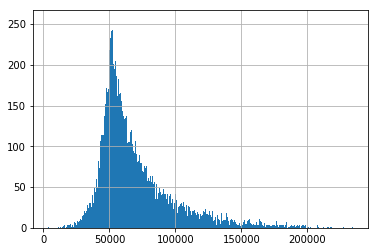

In [107]:
df_delta_trimmed.query("NBPAC_2011==3").Rbg_2011.hist(bins = 1000)


## Double diff 

### Pooled 

In [108]:
m = sm.RLM.from_formula("(Delta_rbg)~   Over_threshold+ Between_thresholds" 
                     
                                                                                            , df)
fit = m.fit()


In [109]:
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Robust linear model
=================================================================================
Model:                      RLM                      Df Residuals:         166502
Dependent Variable:         Delta_rbg                Norm:                 HuberT
Date:                       2019-01-01 21:07         Scale Est.:           mad   
No. Observations:           166505                   Cov. Type:            H1    
Df Model:                   2                        Scale:                8390.7
---------------------------------------------------------------------------------
                             Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
---------------------------------------------------------------------------------
Intercept                  5969.1428  31.0041 192.5277 0.0000 5908.3760 6029.9097
Over_threshold[T.True]     -434.8297  64.2993  -6.7626 0.0000 -560.8540 -308.8054
Between_thresholds[T.True] -615.8865  82.1538  -7.4968 0.0000 -776.9049 -454.8680
=================================================================================

"""

In [110]:
m = sm.RLM.from_formula("(Delta_rbg)~   Over_threshold+ Between_thresholds" 
                     
                                                                                            , df.query("NBPAC_2011 > 0".format(child)))
fit = m.fit()
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Robust linear model
====================================================================================
Model:                       RLM                       Df Residuals:          135850
Dependent Variable:          Delta_rbg                 Norm:                  HuberT
Date:                        2019-01-01 21:07          Scale Est.:            mad   
No. Observations:            135853                    Cov. Type:             H1    
Df Model:                    2                         Scale:                 8105.2
------------------------------------------------------------------------------------
                             Coef.    Std.Err.    z     P>|z|    [0.025     0.975]  
------------------------------------------------------------------------------------
Intercept                   7190.0621  34.4674 208.6045 0.0000  7122.5072  7257.6171
Over_threshold[T.True]     -1647.5685  63.6328 -25.8918 0.0000 -1772.2864 -1522.8506
Between_thresholds[T.True] -1835.6381  80.0428 -22.9332 0.0000 -1992.5191 -1678.7571
====================================================================================

"""

### By child rank 

In [111]:
df.shape

(166505, 551)

In [112]:
 df_temp.query("NBPAC_2011 == {}".format(1))

,ID_FISC_LOG_DIFF,AN_FISC_2011,AN_REVENU_2011,REG_2011,DEP_2011,DEPCOM_2011,TU10_2011,NBFOYM_2011,NBPERSM_2011,INF14M_2011,SUP14M_2011,NBERAM_2011,NB_UC_2011,AGERF_2011,SEXERF_2011,OCCTYP_2011,TYPMEN9_2011,I_CHAMPM_2011,I_PAUVRE50M_2011,I_PAUVRE60M_2011,NB_ALLOC_CNAF_2011,NB_ALLOC_CNAV_2011,NB_ALLOC_MSAF_2011,NB_ALLOC_MSAV_2011,NIVVIEM_2011,CENTILE_2011,REVDISPM_2011,REVPERM_2011,REVINIM_2011,REVDECM_2011,ZTSAM_2011,ZSALM_2011,ZCHOM_2011,ZPERM_2011,ZRETM_2011,ZRSTM_2011,ZALRM_2011,ZRTOM_2011,ZRAGM_2011,ZRICM_2011,ZRNCM_2011,ZFONM_2011,ZVAMM0_2011,ZVAMM_2011,ZVALM0_2011,ZVALM_2011,ZRACM_2011,ZETRM_2011,ZALVM_2011,PSOCM_2011,PFAMM_2011,M_PNAM_2011,M_PAJEM_2011,M_CLCAM_2011,M_COLCAM_2011,M_AFM_2011,M_CFM_2011,M_ARSM_2011,M_AEEHM_2011,M_ASFM_2011,MINIM_2011,M_MINVM_2011,M_RSAM_2011,M_RSA_ACTM_2011,M_RSA_SOCM_2011,M_RSA_PFAM_2011,M_AAH_CAAHM_2011,LOGTM_2011,M_ALFM_2011,M_APLM_2011,M_ALSM_2011,M_ALSETM_2011,M_PPEM_2011,ZIMPOM_2011,ZIMPVALM_2011,ZTHABM_2011,CSGIM_2011,CSGISALM_2011,CRDSM_2011,CRDSSALM_2011,CSGPATM_2011,CSGVALM_2011,CSGIMPM_2011,CSGDM_2011,CSGDSALM_2011,PRODUITFIN_2011,ZPPEM_2011,ZQUOM_2011,ZDIVM_2011,ZGLOM_2011,ZAVFM_2011,ZIMPFORM_2011,NBPAC_2011,GARDEM_2011,SERVDOMM_2011,ZIMPOM_DECL_2011,ZIMPOM_ANC_2011,ZIMPOM_ANC_DECL_2011,ZAVFM_DECL_2011,ZTHABM_DECL_2011,...,Threshold_115185,Threshold_135941,Threshold_150684,Between_threshold_1_child,Between_threshold_2_child,Between_threshold_3_child,Between_threshold_4_child,Between_threshold_5_child,Between_threshold_6_child,Over_threshold_1_child,Over_threshold_2_child,Over_threshold_3_child,Over_threshold_4_child,Over_threshold_5_child,Over_threshold_6_child,Below_thresholds_1_child,Below_thresholds_2_child,Below_thresholds_3_child,Below_thresholds_4_child,Below_thresholds_5_child,Below_thresholds_6_child,Over_threshold,Between_thresholds,Over_1_X_1_child,Between_1_X_1_child,Over_2_X_2_child,Between_2_X_2_child,Over_3_X_3_child,Between_3_X_3_child,Over_4_X_4_child,Between_4_X_4_child,Over_5_X_5_child,Between_5_X_5_child,Over_6_X_6_child,Between_6_X_6_child,Intercept,child_0,child_1,child_2,child_3,child_4,child_5,child_6,Interactions_rbg_child1_between,Interactions_rbg_child2_between,Interactions_rbg_child3_between,Interactions_rbg_child4_between,Interactions_rbg_child5_between,Interactions_rbg_child6_between,Interactions_rbg_child1_over,Interactions_rbg_child2_over,Interactions_rbg_child3_over,Interactions_rbg_child4_over,Interactions_rbg_child5_over,Interactions_rbg_child6_over,Interactions_child1_over,Interactions_child2_over,Interactions_child3_over,Interactions_child4_over,Interactions_child5_over,Interactions_child6_over,Not_touched_by_reform,Delta_Rbg_times_not_touched_reform,Delta_ZTSAM,Delta_ZRAGM,Delta_ZRACM,Delta_ZRNCM,Delta_ZFONM,Delta_ZPERM,Delta_ZRICM,Irpp_2011,Irpp_2014,Delta_NBPAC,Rbg_splines,Distance_to_treatment_2,Rbg2014_below_threshold_0_child,Rbg2014_Over_threshold_1_child,Rbg2014_Between_threshold_1_child,Rbg2014_below_threshold_1_child,Rbg2014_Over_threshold_2_child,Rbg2014_Between_threshold_2_child,Rbg2014_below_threshold_2_child,Rbg2014_Over_threshold_3_child,Rbg2014_Between_threshold_3_child,Rbg2014_below_threshold_3_child,Rbg2014_Over_threshold_4_child,Rbg2014_Between_threshold_4_child,Rbg2014_below_threshold_4_child,Rbg2014_Over_threshold_5_child,Rbg2014_Between_threshold_5_child,Rbg2014_below_threshold_5_child,Rbg2014_Over_threshold_6_child,Rbg2014_Between_threshold_6_child,Rbg2014_below_threshold_6_child,Treatment_0_2014,Treatment_0_2011,Treatment_1_2014,Treatment_1_2011,Treatment_2_2014,Treatment_2_2011


In [113]:
df = df
result_fit_list = list()
for child in range(1,nb_enf_max_for_annalysis+1):
    m = sm.RLM.from_formula("(Delta_rbg)~   Over_threshold+ Between_thresholds" 
                     
                                                                                            , df.query("NBPAC_2011 == {}".format(child)))
    fit = m.fit()
    result_fit_list.append(fit)
summary_col_result = summary_col(result_fit_list, stars = True)

In [114]:
print(summary_col(result_fit_list,model_names =["{} children".format(nb_child) for nb_child in range(1,7)], stars = True))


                             1 children    2 children   3 children    4 children    5 children 
-----------------------------------------------------------------------------------------------
Intercept                  6457.7262***  7010.3981***  7789.0662*** 8605.7693***  8883.5359*** 
                           (85.5119)     (43.9844)     (74.8941)    (221.7701)    (612.7954)   
Over_threshold[T.True]     -2461.8540*** -1052.8314*** -313.1646*   -1164.1332**  3849.0049    
                           (128.2413)    (80.9613)     (170.6742)   (567.1184)    (2365.6156)  
Between_thresholds[T.True] -2981.3507*** -1817.4216*** -877.8454*** -1510.4444*** -5317.9690***
                           (199.3393)    (101.4584)    (175.7411)   (517.7368)    (1490.2137)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Double diff with no child family as control

In [115]:
df_temp = df.query("NBPAC_2011==NBPAC_2014").dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,nb_enf_max_for_annalysis+1):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child", "Intercept"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro


                 Delta_Rbg I   Delta_Rbg II Delta_Rbg III Delta_Rbg IIII Delta_Rbg IIIII
----------------------------------------------------------------------------------------
Between_X_child 4314.9410***  6103.6996***  7659.9845***  7859.6942***   3284.2323*     
                (304.2109)    (205.6153)    (323.7511)    (726.4803)     (1833.6584)    
Over_X_child    4380.9518***  6544.1394***  7626.1477***  7405.0043***   11033.0000***  
                (189.1528)    (179.4234)    (316.8832)    (799.1763)     (3049.0634)    
Intercept       -1078.9773*** -1133.4506*** -1041.0493*** -948.0167***   -673.9927**    
                (116.2654)    (140.4691)    (203.6101)    (273.2238)     (343.6837)     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [116]:
condition_rbg = "True" #TODO: enelever le condition_rbg des cellules, True pour que ce soit neutre.

In [117]:
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg).dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,7):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child", "Intercept"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro


                 Delta_Rbg I   Delta_Rbg II Delta_Rbg III Delta_Rbg IIII Delta_Rbg IIIII Delta_Rbg IIIIII
---------------------------------------------------------------------------------------------------------
Between_X_child 4314.9410***  6103.6996***  7659.9845***  7859.6942***   3284.2323*      0.0000          
                (304.2109)    (205.6153)    (323.7511)    (726.4803)     (1833.6584)     (0.0000)        
Over_X_child    4380.9518***  6544.1394***  7626.1477***  7405.0043***   11033.0000***   0.0000          
                (189.1528)    (179.4234)    (316.8832)    (799.1763)     (3049.0634)     (0.0000)        
Intercept       -1078.9773*** -1133.4506*** -1041.0493*** -948.0167***   -673.9927**     -492.8305       
                (116.2654)    (140.4691)    (203.6101)    (273.2238)     (343.6837)      (424.2211)      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:1079: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [118]:
no_attached = (df.TYPE_FISC_2014.str.count("[3-9]")<1)&(df.TYPE_FISC_2011.str.count("[3-9]")<1)

In [119]:
#Colinear if we put an intercept
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg+"&(@no_attached)").dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,7):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child","Between_threshold_n_child","Over_threshold_n_child"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl


                           Delta_Rbg I   Delta_Rbg II Delta_Rbg III Delta_Rbg IIII Delta_Rbg IIIII Delta_Rbg IIIIII
-------------------------------------------------------------------------------------------------------------------
Between_X_child           4463.9819***  6412.0139***  7988.8750***  9085.4032***   4732.2596*      0.0000          
                          (410.1329)    (285.9355)    (417.8372)    (976.0925)     (2695.4583)     (0.0000)        
Over_X_child              4804.6353***  6648.4242***  7517.4454***  6166.1980***   6658.3754       0.0000          
                          (225.0547)    (222.7682)    (442.3914)    (1200.6739)    (4510.2224)     (0.0000)        
Between_threshold_n_child -939.0846***  -1258.5447*** -1309.0674*** -1387.7789***  -961.4218**     -741.3532       
                          (242.6409)    (229.3514)    (275.3727)    (334.0026)     (392.9365)      (476.6137)      
Over_threshold_n_child    -1121.6269*** -1055.5702*** -695.9487**   -34

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:1079: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [120]:
df_temp2.query("NBPAC_2011==0")[["Between_threshold_1_child"]].Between_threshold_1_child.value_counts()

False    2208
Name: Between_threshold_1_child, dtype: int64

In [121]:
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))


                           Delta_Rbg I   Delta_Rbg II Delta_Rbg III Delta_Rbg IIII Delta_Rbg IIIII Delta_Rbg IIIIII
-------------------------------------------------------------------------------------------------------------------
Between_X_child           4463.9819***  6412.0139***  7988.8750***  9085.4032***   4732.2596*      0.0000          
                          (410.1329)    (285.9355)    (417.8372)    (976.0925)     (2695.4583)     (0.0000)        
Over_X_child              4804.6353***  6648.4242***  7517.4454***  6166.1980***   6658.3754       0.0000          
                          (225.0547)    (222.7682)    (442.3914)    (1200.6739)    (4510.2224)     (0.0000)        
Between_threshold_n_child -939.0846***  -1258.5447*** -1309.0674*** -1387.7789***  -961.4218**     -741.3532       
                          (242.6409)    (229.3514)    (275.3727)    (334.0026)     (392.9365)      (476.6137)      
Over_threshold_n_child    -1121.6269*** -1055.5702*** -695.9487**   -34

In [122]:
for child in [1]:
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        print(liste[child])
        to_keep_regressors.append(liste[child])

Between_threshold_2_child
Over_threshold_2_child
child_2
child_2:Between_threshold_2_child
child_2:Over_threshold_2_child


#### Double diff with no child family as control

In [123]:
to_keep_regressors = []
child_rank_to_include = 0
df_temp = df.query("NBPAC_2011==NBPAC_2014")
for child in range(1,2):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        to_keep_regressors.append(liste[child-1])
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( to_keep_regressors)), df_temp.query("(NBPAC_2011 == {})|(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                    Robust linear Model Regression Results                    
Dep. Variable:              Delta_rbg   No. Observations:                55008
Model:                            RLM   Df Residuals:                    55002
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 01 Jan 2019                                         
Time:                        21:08:02                                         
No. Iterations:                     8                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [124]:
to_keep_regressors = []
child_rank_to_include = 0
df_temp = df.query("NBPAC_2011==NBPAC_2014")
for child in range(1,2):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        to_keep_regressors.append(liste[child-1])
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( to_keep_regressors)), df_temp.query("(NBPAC_2011 == {})|(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                    Robust linear Model Regression Results                    
Dep. Variable:              Delta_rbg   No. Observations:                55008
Model:                            RLM   Df Residuals:                    55002
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 01 Jan 2019                                         
Time:                        21:08:04                                         
No. Iterations:                     8                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [125]:
df.query(
                                                                    "(NBPAC_2011 == {})".format(1)).child_1.value_counts()

True    24356
Name: child_1, dtype: int64

In [126]:
map(between_threshold_for_child_rank.__getitem__,(0,1,2))

In [127]:
to_keep_regressors

['Between_threshold_1_child',
 'Over_threshold_1_child',
 'child_1',
 'child_1:Between_threshold_1_child',
 'child_1:Over_threshold_1_child']

In [128]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,nb_enf_max_for_annalysis+1):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), df.query(
                                                                    "(NBPAC_2011 == {})".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     262.4
Date:                Tue, 01 Jan 2019   Prob (F-statistic):          1.81e-113
Time:                        21:08:04   Log-Likelihood:            -2.6375e+05
No. Observations:               24356   AIC:                         5.275e+05
Df Residuals:                   24353   BIC:                         5.275e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     8.283
Date:                Tue, 01 Jan 2019   Prob (F-statistic):           0.000278
Time:                        21:08:05   Log-Likelihood:                -8046.7
No. Observations:                 727   AIC:                         1.610e+04
Df Residuals:                     724   BIC:                         1.611e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [129]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,nb_enf_max_for_annalysis+1):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), df.query(
                                                                    "(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     616.0
Date:                Tue, 01 Jan 2019   Prob (F-statistic):          5.07e-263
Time:                        21:08:06   Log-Likelihood:            -3.3545e+05
No. Observations:               30652   AIC:                         6.709e+05
Df Residuals:                   30649   BIC:                         6.709e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     48.41
Date:                Tue, 01 Jan 2019   Prob (F-statistic):           1.02e-21
Time:                        21:08:08   Log-Likelihood:            -3.3601e+05
No. Observations:               30652   AIC:                         6.720e+05
Df Residuals:                   30649   BIC:                         6.720e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [130]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,nb_enf_max_for_annalysis+1):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), df.query(
                                                                    "(NBPAC_2011 == {})".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     262.4
Date:                Tue, 01 Jan 2019   Prob (F-statistic):          1.81e-113
Time:                        21:08:09   Log-Likelihood:            -2.6375e+05
No. Observations:               24356   AIC:                         5.275e+05
Df Residuals:                   24353   BIC:                         5.275e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [131]:
from operator import itemgetter
import itertools

In [132]:
itemgetter(0,2,3)(between_threshold_for_child_rank)

('Between_threshold_1_child',
 'Between_threshold_3_child',
 'Between_threshold_4_child')

## Pooled estimation with Treatment one, or two.

In [133]:
df.Treatment_1_2011.value_counts()

False    147681
True      18824
Name: Treatment_1_2011, dtype: int64

In [134]:
no_attached = (df.TYPE_FISC_2014.str.count("[3-9]")<1)&(df.TYPE_FISC_2011.str.count("[3-9]")<1)

In [135]:
m = sm.OLS.from_formula("(Delta_rbg)~ Between_thresholds + Over_threshold".format( 
        ' + '.join(cumulative_child_bool_list+thrsh_bool_list))
                                                                                        , df.query("NBPAC_2011 == NBPAC_2014&(@no_attached)"))
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     21.40
Date:                Tue, 01 Jan 2019   Prob (F-statistic):           5.11e-10
Time:                        21:08:11   Log-Likelihood:            -1.4618e+06
No. Observations:              134039   AIC:                         2.924e+06
Df Residuals:                  134036   BIC:                         2.924e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

###Add controls for trends

In [136]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +{}".format( #AGERF = Age du référent fiscal
        ' + '.join(thrsh_bool_list))
                                                                                        , df)
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     301.3
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:12   Log-Likelihood:            -1.8128e+06
No. Observations:              166505   AIC:                         3.626e+06
Df Residuals:                  166490   BIC:                         3.626e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [137]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +{}".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list))
                                                                                        , df)
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     783.9
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:12   Log-Likelihood:            -1.8122e+06
No. Observations:              166505   AIC:                         3.624e+06
Df Residuals:                  166497   BIC:                         3.624e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [138]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +  {} ".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list+between_threshold_for_child_rank+over_threshold_for_child_rank))
                                                                                        , df)
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     469.0
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:13   Log-Likelihood:            -1.8110e+06
No. Observations:              166505   AIC:                         3.622e+06
Df Residuals:                  166487   BIC:                         3.622e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [139]:
threshold_byr_rbg
flatten_thresholds = np.sort(threshold_byr_rbg.values.flatten())

In [140]:
flatten_thresholds_list = list()
for counter in range(len(flatten_thresholds)-1):
    print(flatten_thresholds[counter], flatten_thresholds[counter+1])
    
    thrsh1, thrsh2 = flatten_thresholds[counter], flatten_thresholds[counter+1]
    flatten_thresholds_list.append("Flatten_thresholds_{}_{}".format(thrsh1, thrsh2))
    df["Flatten_thresholds_{}_{}".format(thrsh1, thrsh2)] = ((df.Rbg_2011>  thrsh1)
                                                                                               & (df.Rbg_2011< thrsh2))
df["Flatten_thresholds_more_then_{}".format( thrsh2)] = df.Rbg_2011> thrsh2
flatten_thresholds_list.append("Flatten_thresholds_more_then_{}".format(thrsh2))

58291 63233
63233 63530
63530 73516
73516 73806
73806 84103
84103 94368
94368 94451
94451 104633
104633 115185
115185 135941
135941 150684


In [141]:
flatten_thresholds_list = list()
for counter in range(len(flatten_thresholds)-1):
    print(flatten_thresholds[counter], flatten_thresholds[counter+1])
    flatten_thresholds_list.append("Flatten_thresholds_{}_{}".format(thrsh1, thrsh2))
    thrsh1, thrsh2 = flatten_thresholds[counter], flatten_thresholds[counter+1]
    df["Flatten_thresholds_{}_{}".format(thrsh1, thrsh2)] = ((df.Rbg_2011>  thrsh1)
                                                                                               & (df.Rbg_2011< thrsh2))
df["Flatten_thresholds_more_then_{}".format( thrsh2)] = df.Rbg_2011> thrsh2
flatten_thresholds_list.append("Flatten_thresholds_more_then_{}".format(thrsh2))

58291 63233
63233 63530
63530 73516
73516 73806
73806 84103
84103 94368
94368 94451
94451 104633
104633 115185
115185 135941
135941 150684


In [142]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +  {} ".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list+flatten_thresholds_list))
                                                                                        , df)
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     423.0
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:14   Log-Likelihood:            -1.8110e+06
No. Observations:              166505   AIC:                         3.622e+06
Df Residuals:                  166485   BIC:                         3.622e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [143]:
flatten_thresholds_list

['Flatten_thresholds_135941_150684',
 'Flatten_thresholds_58291_63233',
 'Flatten_thresholds_63233_63530',
 'Flatten_thresholds_63530_73516',
 'Flatten_thresholds_73516_73806',
 'Flatten_thresholds_73806_84103',
 'Flatten_thresholds_84103_94368',
 'Flatten_thresholds_94368_94451',
 'Flatten_thresholds_94451_104633',
 'Flatten_thresholds_104633_115185',
 'Flatten_thresholds_115185_135941',
 'Flatten_thresholds_more_then_150684']

In [144]:
# Boum
# for nb_enf in range(1,7):
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")



# reg_df_same_NBPAC["Over_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Over_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

In [145]:
# reg_df_same_NBPAC["Between_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Between_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")



# reg_df_same_NBPAC["Over_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Over_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

In [146]:

for nb_enf in range(1,7):
    df["Below_thresholds_{}_child_rbg_2014".format(nb_enf)] = np.zeros(df.shape[0])
for nb_enf in range(1,7):
    df["Below_thresholds_{}_child_rbg_2014".format(nb_enf)
          ] +=((df.Rbg_2014<  threshold_byr_rbg["2014"].iloc[nb_enf-1])).astype("float")

    


In [147]:
below_threshold_for_child_rank = ["Below_thresholds_{}_child_rbg_2014".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
interaction_child_below_thresholds  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, below_threshold_for_child_rank)]

## Triple diff estimation

In [148]:
#reg_df_same_NBPAC[over_threshold_for_child_rank+["NBPAC_2011"]]

In [149]:
threshold_byr_rbg

,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [150]:
df.shape

(166505, 569)

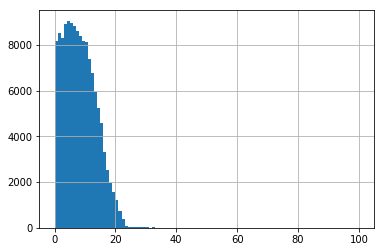

In [151]:
df.Age_youngest_child.hist(bins = 100)

### Classical 

#### On all the population

In [152]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached) ")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     123.6
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:15   Log-Likelihood:            -1.0075e+06
No. Observations:               93254   AIC:                         2.015e+06
Df Residuals:                   93228   BIC:                         2.015e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [153]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(@no_attached)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     295.8
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:17   Log-Likelihood:            -1.4583e+06
No. Observations:              134039   AIC:                         2.917e+06
Df Residuals:                  134013   BIC:                         2.917e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [154]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     295.8
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:19   Log-Likelihood:            -1.4583e+06
No. Observations:              134039   AIC:                         2.917e+06
Df Residuals:                  134013   BIC:                         2.917e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [155]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     321.3
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:21   Log-Likelihood:            -1.8110e+06
No. Observations:              166505   AIC:                         3.622e+06
Df Residuals:                  166479   BIC:                         3.622e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [156]:
    control_variables1 = "+CONTRAT_TRAVAIL_2011_father+CONTRAT_TRAVAIL_2011_mother+ I(DOMEMPL_2011_father)+I(DOMEMPL_2011_mother)+I(Age_father)+ I(Age_mother)"

In [157]:
control_variables = "+Age_eldest_child+Age_youngest_child+OCCTYP_2011+I(TU10_2011)+I(NBPP_2011)+ I(DEP_2011)+I(CNE_2011)+SURFTOT_2011+Age_father+ Age_mother"

In [158]:
#Flatten pas de départ ç la retraite
m = sm.OLS.from_formula("(Delta_rbg)~   {}".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZPERM_2011<100)& (ZPERM_2014<100) & (Age_father<100)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     113.3
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:22   Log-Likelihood:            -1.2207e+06
No. Observations:              112460   AIC:                         2.441e+06
Df Residuals:                  112432   BIC:                         2.442e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [159]:
#Flatten
m = sm.OLS.from_formula("(Delta_rbg)~   {}".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))#+control_variables
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 >= 0)&(ZPERM_2011<100) & (Age_father<100)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:23   Log-Likelihood:            -1.3043e+06
No. Observations:              119953   AIC:                         2.609e+06
Df Residuals:                  119925   BIC:                         2.609e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [160]:
#Flatten
m = sm.OLS.from_formula("(Delta_rbg)~   {}+I(Age_youngest_child+10)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))#+control_variables
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 >= 0)&(ZPERM_2011<100) & (Age_father<100)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     95.13
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:24   Log-Likelihood:            -1.0750e+06
No. Observations:               99030   AIC:                         2.150e+06
Df Residuals:                   99002   BIC:                         2.150e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [161]:
df.Age_youngest_child
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     55.99
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:25   Log-Likelihood:            -1.0557e+06
No. Observations:               97785   AIC:                         2.111e+06
Df Residuals:                   97752   BIC:                         2.112e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [162]:
m = sm.OLS.from_formula("Delta_rbg~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number[:-2]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list[:-2]+hardcoded_between[:-2]+hardcoded_over[:-2]))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(Age_eldest_child<20)&(Age_youngest_child>1)&(NBPAC_2011 <= 4)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)



                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     93.62
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:26   Log-Likelihood:            -1.1928e+06
No. Observations:              110001   AIC:                         2.386e+06
Df Residuals:                  109973   BIC:                         2.386e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [163]:
m = sm.OLS.from_formula("Delta_rbg~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number[:-1]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list[:-1]+hardcoded_between[:-1]+hardcoded_over[:-1]))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(Age_eldest_child<10)&(NBPAC_2011 <= 5)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)



                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     48.33
Date:                Tue, 01 Jan 2019   Prob (F-statistic):          4.17e-291
Time:                        21:08:27   Log-Likelihood:            -5.2081e+05
No. Observations:               48010   AIC:                         1.042e+06
Df Residuals:                   47978   BIC:                         1.042e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [164]:
df['Likely_to_get_retired'] = False
df.loc[((df.Age_father>58)&(df.Age_father<65)), 'Likely_to_get_retired'] = True

df.loc[((df.Age_mother>58)&(df.Age_mother<65)), 'Likely_to_get_retired'] = True

In [165]:
df.Likely_to_get_retired.value_counts(dropna = False)

False    152577
True      13928
Name: Likely_to_get_retired, dtype: int64

In [166]:
m = sm.OLS.from_formula("Delta_rbg~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number[:-2]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(Likely_to_get_retired==False)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)



                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     107.9
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:08:29   Log-Likelihood:            -1.4481e+06
No. Observations:              133424   AIC:                         2.896e+06
Df Residuals:                  133390   BIC:                         2.897e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [167]:
m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                                 OLS Regression Results                                
Dep. Variable:     np.log(Rbg_2014 / Rbg_2011)   R-squared:                       0.090
Model:                                     OLS   Adj. R-squared:                  0.090
Method:                          Least Squares   F-statistic:                     662.1
Date:                         Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                                 21:08:31   Log-Likelihood:                 29185.
No. Observations:                       166505   AIC:                        -5.832e+04
Df Residuals:                           166479   BIC:                        -5.806e+04
Df Model:                                   25                                         
Covariance Type:                     nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--

#### Different samples

In [168]:
###Basic
regression_fit_list = list()
regression_delta_zimpom_fit_list = list()
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###Both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)




## Without retirement income in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<1000)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#### Without retirement income both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#Super select
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)




#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)
#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(Age_father<40)"))

fit = m.fit()
regression_fit_list.append(fit)


###log ratio

m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)





#log ratio Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)

In [169]:

print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                                   Delta_rbg I   Delta_rbg II Delta_rbg III Delta_rbg IIII Delta_rbg IIIII Delta_rbg IIIIII Delta_rbg IIIIIII Delta_rbg IIIIIIII Delta_rbg IIIIIIIII np.log(Rbg_2014 / Rbg_2011) I np.log(Rbg_2014 / Rbg_2011) II
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Age_eldest_child                                                                                                                                              -125.7277***       -402.8643***                                                                    
                                                                                                                                                              (41.6843)          (121.6547)                                      

In [170]:
###Basic
regression_fit_list = list()
regression_delta_zimpom_fit_list = list()
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###Both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)




## Without retirement income in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<1000)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#### Without retirement income both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#Super select
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)




#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)
#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(Age_father<40)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)


###log ratio

m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)





#log ratio Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)"))

fit = m.fit()
regression_fit_list.append(fit)

In [171]:

print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                                   Delta_rbg I   Delta_rbg II Delta_rbg III Delta_rbg IIII Delta_rbg IIIII Delta_rbg IIIIII Delta_rbg IIIIIII Delta_rbg IIIIIIII Delta_rbg IIIIIIIII np.log(Rbg_2014 / Rbg_2011) I np.log(Rbg_2014 / Rbg_2011) II
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Age_eldest_child                                                                                                                                              -229.0051***       -357.5103***                                                                    
                                                                                                                                                              (56.2045)          (125.4669)                                      

### How well do we match the reform ?

In [172]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,7)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,7)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,7)]

In [173]:
regression_delta_zimpom_formula = "(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))

In [174]:
m = sm.RLM.from_formula(regression_delta_zimpom_formula  , df)#; regression_delta_zimpom_fit_list.append()

In [175]:
df["Stays_in_same_treatment"]= ((df.Treatment_0_2011 & df.Treatment_0_2014)
                                               +(df.Treatment_1_2011 & df.Treatment_1_2014)
                                               +(df.Treatment_2_2011 & df.Treatment_2_2014))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [176]:
## With no attached in conditions
###Basic
regression_fit_list = list()
regression_delta_zimpom_fit_list = list()
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###Both years
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)




## Without retirement income in 2011
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<1000)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#### Without retirement income both years
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)

#### Without retirement income both years,both year on th ecorrect income span
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                                                                &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)





#### Without retirement income both years,both year on th ecorrect income span
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                                                                &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(@no_attached)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



### Stay in same treatment
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(@no_attached)&(Stays_in_same_treatment)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


print(summary_col(regression_fit_list, stars = True, 
                  model_names=["Delta_ZIMPOM", "Both_year", "No_ZPERM_2011", "No_ZPERM", "Both_year_and_no_ZPERM", "Both_pays_tax_no_exotic_income", "Stays_in_same_treatment"],
                  info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                    Delta_ZIMPOM   Both_year   No_ZPERM_2011    No_ZPERM   Both_year_and_no_ZPERM Both_pays_tax_no_exotic_income Stays_in_same_treatment
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Interactions_child1_over           1234.5365***  1107.8330***  1236.9055***  1243.7011***  1161.0060***           1161.0060***                   1069.8160***           
                                   (50.6114)     (55.5365)     (52.7524)     (54.4643)     (42.5514)              (42.5514)                      (68.2891)              
Interactions_child2_over           2053.6364***  1998.7266***  2060.1814***  2052.8799***  1890.4293***           1890.4293***                   1895.7303***           
                                   (35.3763)     (38.0109)     (36.2010)     (36.7167)     (30.2184)              (30.2184)                      (46.5072)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:1079: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [178]:
###Basic
regression_fit_list = list()
regression_delta_zimpom_fit_list = list()
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###Both years
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)




## Without retirement income in 2011
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<1000)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#### Without retirement income both years
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)

#### Without retirement income both years,both year on th ecorrect income span
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                                                                &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)





#### Without retirement income both years,both year on th ecorrect income span
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                                                                &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###log ratio
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                   Delta_ZIMPOM I Delta_ZIMPOM II Delta_ZIMPOM III Delta_ZIMPOM IIII Delta_ZIMPOM IIIII Delta_ZIMPOM IIIIII Delta_ZIMPOM IIIIIII
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Interactions_child1_over           1252.2719***   1128.7621***    1243.4817***     1238.6706***      1106.2539***       1106.2539***        1252.2719***        
                                   (42.1858)      (46.3413)       (44.8102)        (47.0942)         (36.5621)          (36.5621)           (42.1858)           
Interactions_child2_over           1988.1609***   1937.3184***    1988.4313***     1982.8766***      1820.3309***       1820.3309***        1988.1609***        
                                   (30.8924)      (33.2773)       (31.8098)        (32.3868)         (26.3841)          (26.3841)           (30.8924)           
Interactions_child3_over         

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:1079: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [179]:
df[df.Between_thresholds].query("NBPAC_2011==5").Stays_in_same_treatment.value_counts(normalize =True)

True     0.681034
False    0.318966
Name: Stays_in_same_treatment, dtype: float64